In [1]:
# 일단은 필요한 라이브러리들 import부터 ㄱㄱ!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
# 가격 데이터 불러올 종목코드와 종목명들
symbols = {'005930':'samsung', '005380':'hyundai', '030200':'KT'}

In [3]:
# 개인적으로 만든 코드뭉치인데....
import porfolio_vis as pv

In [4]:
data = pd.DataFrame()
for sym in tqdm(symbols.keys()):
    data[symbols[sym]] = pv.get_data.get_naver_close(sym)[sym]

100%|██████████| 3/3 [00:01<00:00,  2.83it/s]


In [5]:
data

,samsung,hyundai,KT
date,,,
2005-06-02,9750.0,57000.0,40900.0
2005-06-03,9760.0,57400.0,40800.0
2005-06-07,9610.0,56800.0,41000.0
2005-06-08,9550.0,57000.0,41100.0
2005-06-09,9600.0,57300.0,41800.0
...,...,...,...
2021-07-26,78800.0,224500.0,33600.0
2021-07-27,78500.0,225000.0,33250.0
2021-07-28,79200.0,222500.0,33800.0


In [6]:
data_2020 = data[data.index >= '2020-01-01']
data_2020

,samsung,hyundai,KT
date,,,
2020-01-02,55200.0,118000.0,26700.0
2020-01-03,55500.0,116000.0,26600.0
2020-01-06,55500.0,116000.0,26400.0
2020-01-07,55800.0,115500.0,26550.0
2020-01-08,56800.0,112000.0,26150.0
...,...,...,...
2021-07-26,78800.0,224500.0,33600.0
2021-07-27,78500.0,225000.0,33250.0
2021-07-28,79200.0,222500.0,33800.0


In [7]:
rets = np.log(data_2020.pct_change()+1)
rets

,samsung,hyundai,KT
date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.005420,-0.017094,-0.003752
2020-01-06,0.000000,0.000000,-0.007547
2020-01-07,0.005391,-0.004320,0.005666
2020-01-08,0.017762,-0.030772,-0.015181
...,...,...,...
2021-07-26,-0.006325,-0.004444,-0.032214
2021-07-27,-0.003814,0.002225,-0.010471
2021-07-28,0.008878,-0.011173,0.016406


In [8]:
weights = np.random.random(len(symbols))
weights = weights / np.sum(weights)             # weights = weights / np.sum(weights) 이런계산을 한 것
weights

array([0.10635451, 0.41423932, 0.47940617])

In [9]:
rets.mean()*weights

samsung    0.000096
hyundai    0.000649
KT         0.000288
dtype: float64

In [10]:
mu = np.sum(rets.mean() * weights) * 252                        # 포트폴리오 (연율화) 수익률의 합
mu    

0.2602017555051053

In [11]:
square_sigma = np.dot(weights.T, np.dot(rets.cov(), weights))   # 포트폴리오 분산
sigma = np.sqrt(square_sigma)
sigma

0.018060215854170798

In [12]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(len(symbols))
    weights = weights / np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

In [13]:
prets

array([0.28417627, 0.21102191, 0.32439761, ..., 0.28427799, 0.21517431,
       0.25626507])

In [14]:
pvols

array([0.30422627, 0.24637305, 0.35448875, ..., 0.30788014, 0.25916276,
       0.28554001])

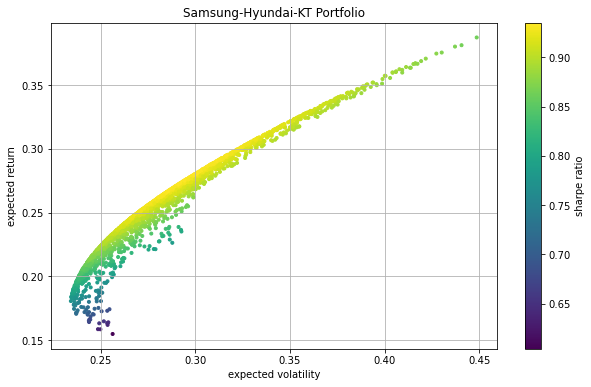

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets/pvols, marker='.')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title('Samsung-Hyundai-KT Portfolio')
plt.colorbar(label='sharpe ratio')   
plt.show()